# 逻辑回归 Logistic Regression



在这一次练习中，我们将要实现逻辑回归并且应用到一个分类任务。我们还将通过将正则化加入训练算法，来提高算法的鲁棒性，并用更复杂的情形来测试它。


## 准备数据

在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。

让我们从检查数据开始。

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
def get_X(df):#读取特征
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)  
    return data.iloc[:, :-1].values

def get_y(df):#读取标签
    return np.array(df.iloc[:, -1])


def normalize_feature(df): #特征缩放
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [8]:
X = get_X(data)
print(X.shape)
y = get_y(data)
print(y.shape)

(100, 3)
(100,)


看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果。

## Sigmoid 函数
$g$ 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$
合起来，我们得到逻辑回归模型的假设函数： 
	${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

让我们做一个快速的检查，来确保它可以工作。

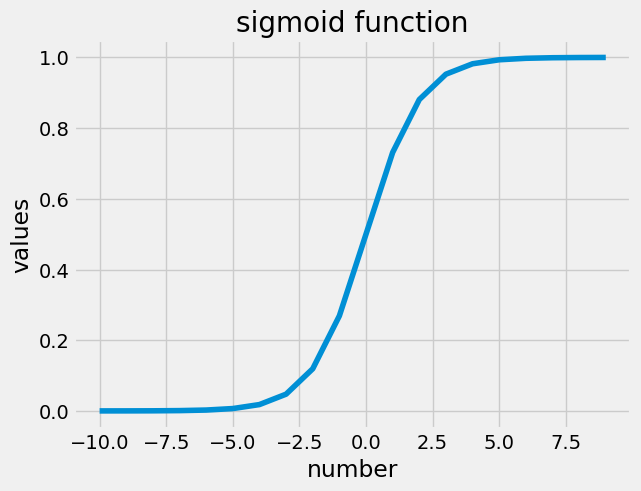

In [13]:
id = np.arange(-10,10,1)
ans = []
for i in id :
    ans.append(sigmoid(i))
plt.plot(id,ans)
plt.xlabel('number')
plt.ylabel('values')
plt.title('sigmoid function')
plt.show()

## Cost Function 代价函数

代价函数：
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [18]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(theta @ X.T)) - (1 - y) * np.log(1 - sigmoid(theta @ X.T))) 

让我们来检查矩阵的维度来确保一切良好。

In [19]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [22]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

让我们计算初始化参数的代价函数(theta为0)。

In [23]:
cost(theta, X, y)

np.float64(0.6931471805599453)

## Gradient descent 梯度下降
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{\left({h_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}\right)x_{_{j}}^{(i)}}$$

In [38]:
def gradient(theta, X, y):
    # a = ( theta @ X.T )
    # print(a.shape)
    return (1 / len(X)) *  ( (sigmoid(theta @ X.T) - y) @ X  ) 

In [40]:
def graddescend(theta,X,y,epoch,alpha) :
    _theta = theta.copy()
    dur_cost = [cost(theta,X,y)]

    for i in range(0,epoch + 1,1):
        _theta = _theta - alpha * gradient(_theta,X,y)
        dur_cost.append(cost(_theta,X,y))
    return _theta,dur_cost


注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

我们看看用我们的数据和初始参数为0的梯度下降法的结果。

In [42]:
epoch = 500
alpha = 0.5
A , B = graddescend(theta, X, y,epoch,alpha)
print(A)

[-19.0110746   29.01570698   5.45188312]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25168\3587480041.py:2: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(sigmoid(theta @ X.T)) - (1 - y) * np.log(1 - sigmoid(theta @ X.T)))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25168\3587480041.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-y * np.log(sigmoid(theta @ X.T)) - (1 - y) * np.log(1 - sigmoid(theta @ X.T)))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25168\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## 拟合参数

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [45]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.20349770165118783
       x: [-2.516e+01  2.062e-01  2.015e-01]
     nit: 28
     jac: [-1.792e-05 -1.156e-03 -1.095e-03]
    nfev: 72
    njev: 184
    nhev: 0


让我们看看在这个结论下代价函数计算结果是什么个样子~

In [46]:
cost(res.x, X, y)

np.float64(0.20349770165118783)

## 用训练集预测和验证

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$ 
* 当${{h}_{\theta }}$大于等于0.5时，预测 y=1   
* 当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [58]:
def predict(theta, X):
    # p = sigmoid( X @ theta.T )
    # ans = []
    # for l in p:
    #     if l >= 0.5:
    #      ans.append(1)
    #     else:
    #      ans.append(0)
    # return ans
    p = sigmoid(X @ theta.T)
    return (p >=0.5).astype(int)

In [60]:
theta_min = res.x
predictions = predict(theta_min, X)
accuracy = sum(predictions == y) / len(y) * 100
print(f'正确率是: {accuracy}')

正确率是: 89.0


### 过拟合的问题
在这之前，已经介绍了线性回归和逻辑回归，它们能够有效地解决许多问题。但当将它们应用到某些特定的机器学习问题时，可能遇到过拟合(over-fitting)的问题，过拟合可能会导致这些算法的效果很差。

如果我们有非常多的特征，我们通过学习得到的假设可能能够非常好地适应训练集（代价函数可能几乎为0），但是可能会不能推广到新的数据。下图是一个回归问题的例子：

![图片啊啊啊啊](https://camo.githubusercontent.com/32fb2dcedd7a75d27cf88645b79512f8a7ee41cbd2593d0923d0484bfe4e0e10/68747470733a2f2f7261772e6769746875622e636f6d2f6c6f7665756e6b2f436f7572736572612d4d4c2d416e647265774e672d4e6f7465732f6d61737465722f696d616765732f37326638343136356662663137353363643531366536356435653931633064332e6a7067)

上图中，第一个是线性模型，明显欠拟合（under-fitting），因为不能很好地适应训练集；第三个模型是一个四次方的模型，过于强调拟合原始数据，而丢失了算法的本质：预测新数据。可以看出，若给出一个新的值使之预测，它将表现的很差，是过拟合，虽然能非常好地适应训练集，但在新输入变量进行预测时可能效果不好；而中间的模型最合适。

分类问题中也存在这样的问题：

![](https://camo.githubusercontent.com/9cfe62c715f036d8261498dd288bbb4e293d08d5a786ecbc0c7d50002bb0d14e/68747470733a2f2f7261772e6769746875622e636f6d2f6c6f7665756e6b2f436f7572736572612d4d4c2d416e647265774e672d4e6f7465732f6d61737465722f696d616765732f62653339623439373538383439396436373139343263633135303236653461322e6a7067)


**所以，我们需要正则化！！！**